In [ ]:
import torch
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!python3 -m pip install torch torchvision

In [24]:
a = torch.tensor(2)
a * 2

tensor(4)

In [25]:
a = torch.tensor([1,2,3])
b = torch.tensor([6,7,8])
a + b

tensor([ 7,  9, 11])

In [61]:
w = torch.randn(1, dtype=torch.float, requires_grad=True)
b = torch.tensor(0, dtype=torch.float, requires_grad=True)
w, b

(tensor([-0.2887], requires_grad=True), tensor(0., requires_grad=True))

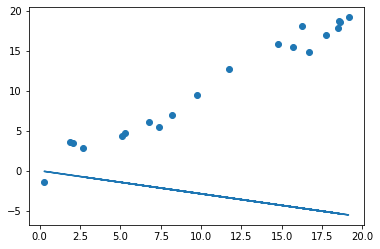

In [62]:
point_count = 20
x = np.random.uniform(0, 20, size=(point_count,))
y = x + np.random.randn(point_count)

# print(np.concatenate([x.reshape(point_count, 1), y.reshape(point_count, 1)], axis=1))

plt.close()
plt.scatter(x, y)
with torch.no_grad():
    plt.plot(x, w*torch.from_numpy(x).float() + b)
plt.show()

tensor(7289.6509, grad_fn=<MeanBackward0>)
tensor(799.2203, grad_fn=<MeanBackward0>)
tensor(88.5816, grad_fn=<MeanBackward0>)
tensor(10.7737, grad_fn=<MeanBackward0>)
tensor(2.2545, grad_fn=<MeanBackward0>)
tensor(1.3217, grad_fn=<MeanBackward0>)
tensor(1.2196, grad_fn=<MeanBackward0>)
tensor(1.2084, grad_fn=<MeanBackward0>)
tensor(1.2071, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)
tensor(1.2070, grad_fn=<MeanBackward0>)


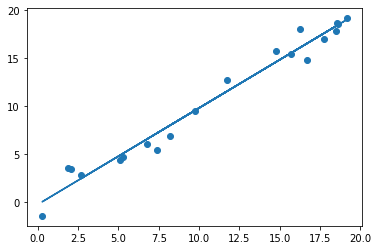

In [72]:
for _ in range(20):
    pred = w*torch.from_numpy(x).float() + b
    mse = (pred - torch.from_numpy(y).float()).pow(2).mean()
    mse.backward()
    print(mse)
    with torch.no_grad():
        w -= 1e-3*w.grad
        b -= 2e-1*b.grad
        
        w.grad.zero_()
        b.grad.zero_()
plt.close()
plt.scatter(x, y)
with torch.no_grad():
    plt.plot(x, w*torch.from_numpy(x).float() + b)
plt.show()

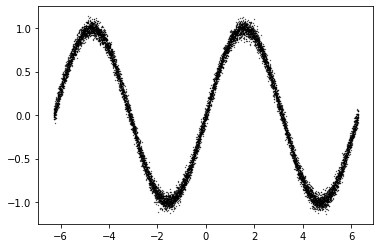

In [3]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [4]:
batch_size = 32

def create_model(input_size):
    
    n_layers = 2
    size = 20
    output_size = 1
    
    in_size = input_size
    out_size = size
    
    layers = []
    
    for i in range(n_layers):
        l = torch.nn.Linear(in_size, out_size, bias=True)
        in_size = out_size
        out_size = size
        
        layers.append(l)
        layers.append(torch.nn.ReLU())
    
    layers.append(torch.nn.Linear(size, output_size, bias=True))
    return layers

layers = create_model(1)
parameters = []
for l in layers:
    parameters.extend(l.parameters())

learning_rate = 1e-2
optimizer = torch.optim.Adam(parameters, lr=learning_rate)
loss_fn = torch.nn.MSELoss(reduction='sum')

for i in tqdm(range(10000)):
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = torch.from_numpy(inputs[indices]).float()
    output_batch = torch.from_numpy(outputs[indices]).float()
    
    x = input_batch
    
    for idx, l in enumerate(layers):
        x = l(x)
    
    loss = loss_fn(x, output_batch)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 1000 == 0:
        print(loss)

tensor(36.5905, grad_fn=<MseLossBackward>)
tensor(0.1133, grad_fn=<MseLossBackward>)
tensor(0.4753, grad_fn=<MseLossBackward>)
tensor(0.1303, grad_fn=<MseLossBackward>)
tensor(0.1044, grad_fn=<MseLossBackward>)
tensor(0.1336, grad_fn=<MseLossBackward>)
tensor(0.2039, grad_fn=<MseLossBackward>)
tensor(0.1451, grad_fn=<MseLossBackward>)
tensor(0.1151, grad_fn=<MseLossBackward>)
tensor(0.1094, grad_fn=<MseLossBackward>)



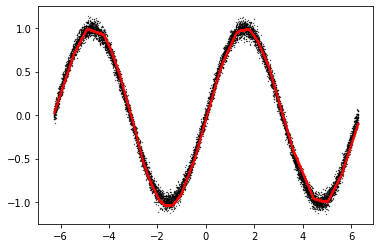

In [5]:
x = torch.from_numpy(inputs).float()

with torch.no_grad():
    for idx, l in enumerate(layers):
        x = l(x)
        if idx != len(layers) - 1:
            x.clamp(min=0)

x = x.numpy()
plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], x, c='r', marker='o', s=0.1)

In [6]:
batch_size = 32

model = torch.nn.Sequential(
    torch.nn.Linear(1, 20),
    torch.nn.ReLU(),
    torch.nn.Linear(20, 20),
    torch.nn.ReLU(),
    torch.nn.Linear(20, 1),
)

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss(reduction='sum')

for i in tqdm(range(10000)):
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = torch.from_numpy(inputs[indices]).float()
    output_batch = torch.from_numpy(outputs[indices]).float()
    
    x = model(input_batch)
    
    loss = loss_fn(x, output_batch)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 1000 == 0:
        print(loss)

tensor(22.0606, grad_fn=<MseLossBackward>)
tensor(0.3278, grad_fn=<MseLossBackward>)
tensor(0.2262, grad_fn=<MseLossBackward>)
tensor(0.0934, grad_fn=<MseLossBackward>)
tensor(0.1900, grad_fn=<MseLossBackward>)
tensor(0.1840, grad_fn=<MseLossBackward>)
tensor(0.1366, grad_fn=<MseLossBackward>)
tensor(0.1322, grad_fn=<MseLossBackward>)
tensor(0.1241, grad_fn=<MseLossBackward>)
tensor(0.0886, grad_fn=<MseLossBackward>)



In [18]:
# architektura wygląda w nastempujący sposób:
# [ [Conv(3x3) -> BatchNorm]x2 -> MaxPool -> Dropout ]x3 -> Dense -> scores
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = torch.nn.Sequential(
    torch.nn.Conv2d(3, 32, 3, stride=1),
    torch.nn.ReLU(),
    torch.nn.BatchNorm2d(32),
    torch.nn.Conv2d(32, 32, 3, stride=1),
    torch.nn.ReLU(),
    torch.nn.BatchNorm2d(32),
    torch.nn.MaxPool2d(2, 2),
    torch.nn.Dropout(0.3),
    
    torch.nn.Conv2d(32, 64, 3, stride=1),
    torch.nn.ReLU(),
    torch.nn.BatchNorm2d(64),
    torch.nn.Conv2d(64, 64, 3, stride=1),
    torch.nn.ReLU(),
    torch.nn.BatchNorm2d(64),
    #torch.nn.MaxPool2d((2,2), stride=(2,2)),
    torch.nn.Dropout(0.3),
    
    torch.nn.Flatten(),
    
    torch.nn.Linear(6400, 10, bias=True),
)


loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-3)


In [19]:
import torchvision
import torchvision.transforms as transforms

In [20]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [21]:
model.to(device)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        
        inputs.to(device)
        labels.to(device)
        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.834
[1,  4000] loss: 1.664
[1,  6000] loss: 1.413
[1,  8000] loss: 1.288
[1, 10000] loss: 1.229
[1, 12000] loss: 1.186
[2,  2000] loss: 1.091
[2,  4000] loss: 1.083
[2,  6000] loss: 1.083
[2,  8000] loss: 1.055
[2, 10000] loss: 1.028
[2, 12000] loss: 1.027
Finished Training
